## 🧊 FrozenLake RL: SARSA vs Q-Learning

---

This notebook compares two foundational RL algorithms on the FrozenLake-v1 environment: 
- SARSA (on-policy)
- Q-Learning (off-policy)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Algorithms.q_learning import Q_Learning
from Algorithms.sarsa import Sarsa
import gym 

%matplotlib inline

##### Create the environment. Then initialize and train the agents

In [9]:
%%capture
env1 = gym.make("FrozenLake-v1",is_slippery = True)
env2 = gym.make("FrozenLake-v1",is_slippery = True)

sarsa = Sarsa(env1,seed = 21)
q_learning = Q_Learning(env2,seed = 21)

sarsa_results = sarsa.train(5000)
q_results = q_learning.train(5000)
env1.close()
env2.close()

##### Compare how long the episodes lasted over time

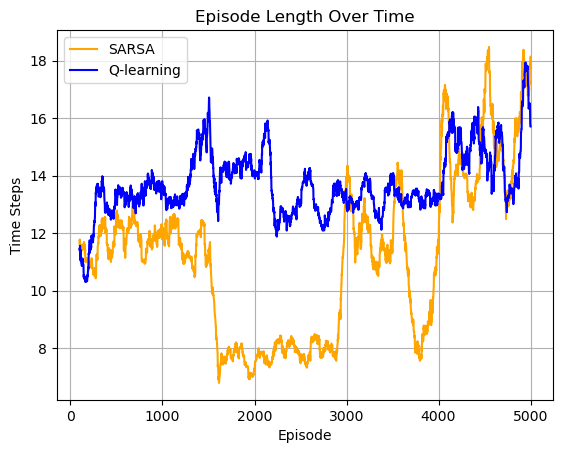

In [3]:
window = 100
sarsa_smoothed = pd.Series(sarsa_results['time_steps']).rolling(window).mean()
q_learning_smoothed = pd.Series(q_results['time_steps']).rolling(window).mean()

plt.plot(sarsa_smoothed, label='SARSA', color='orange')
plt.plot(q_learning_smoothed, label='Q-learning', color='blue')
plt.xlabel("Episode")
plt.ylabel("Time Steps")
plt.title("Episode Length Over Time")
plt.legend()
plt.grid(True)
plt.show()


##### Did the average reward per 100 episodes increase over time?

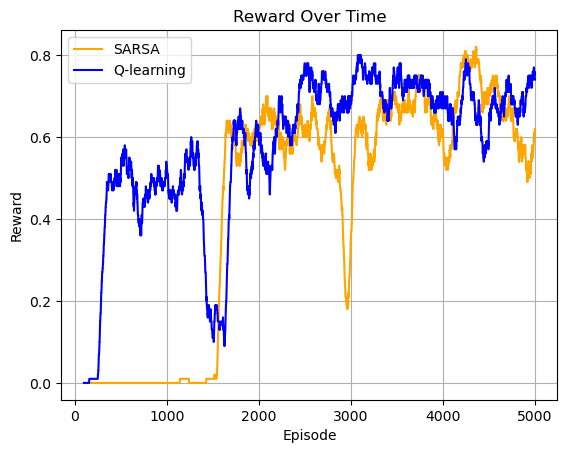

In [4]:
window = 100
sarsa_smoothed = pd.Series(sarsa_results['reward']).rolling(window).mean()
q_learning_smoothed = pd.Series(q_results['reward']).rolling(window).mean()

plt.plot(sarsa_smoothed, label='SARSA', color='orange')
plt.plot(q_learning_smoothed, label='Q-learning', color='blue')
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("Reward Over Time")
plt.legend()
plt.grid(True)
plt.show()

### Both the environment and the algorithms contain stochasticity

Let’s explore how different random seeds affect performance, and average the results to better understand each algorithm’s learning behavior.

In [5]:
seeds = [_ for _ in range(1,11)]

del sarsa
del q_learning

sarsa_runs = []
q_runs = []

for seed in seeds:
    env1 = gym.make("FrozenLake-v1", is_slippery=True)
    sarsa = Sarsa(env = env1,seed = seed)
    sarsa_results = sarsa.train(5000)
    sarsa_runs.append(sarsa_results)
    env1.close()

    env2 = gym.make("FrozenLake-v1", is_slippery=True)
    q_learning = Q_Learning(env = env2,seed = seed)
    q_results = q_learning.train(5000)
    q_runs.append(q_results)
    env2.close()

In [6]:
sarsa_time_stack = np.stack([run["time_steps"].to_numpy() for run in sarsa_runs])
q_time_stack = np.stack([run["time_steps"].to_numpy() for run in q_runs])

sarsa_reward_stack = np.stack([run["reward"].to_numpy() for run in sarsa_runs])
q_reward_stack = np.stack([run["reward"].to_numpy() for run in q_runs])

sarsa_time_mean = sarsa_time_stack.mean(axis=0)
q_time_mean = q_time_stack.mean(axis=0)
sarsa_reward_mean = sarsa_reward_stack.mean(axis=0)
q_reward_mean = q_reward_stack.mean(axis=0)

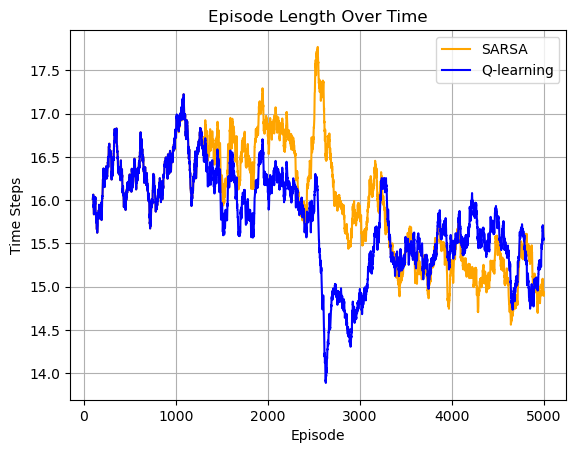

In [7]:
window = 100
sarsa_smoothed = pd.Series(sarsa_time_mean).rolling(window).mean()
q_learning_smoothed = pd.Series(q_time_mean).rolling(window).mean()

plt.plot(sarsa_smoothed, label='SARSA', color='orange')
plt.plot(q_learning_smoothed, label='Q-learning', color='blue')
plt.xlabel("Episode")
plt.ylabel("Time Steps")
plt.title("Episode Length Over Time")
plt.legend()
plt.grid(True)
plt.show()

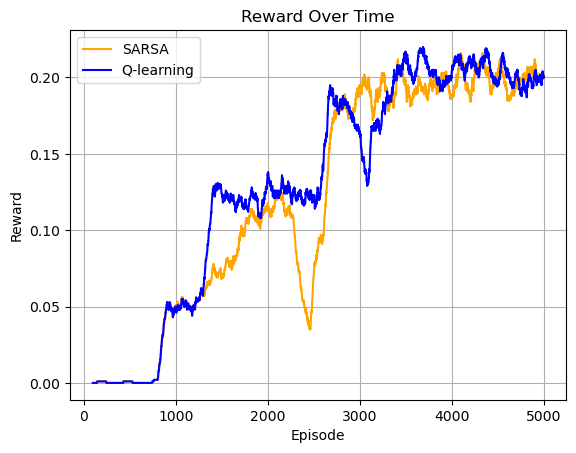

In [8]:
window = 100
sarsa_smoothed = pd.Series(sarsa_reward_mean).rolling(window).mean()
q_learning_smoothed = pd.Series(q_reward_mean).rolling(window).mean()

plt.plot(sarsa_smoothed, label='SARSA', color='orange')
plt.plot(q_learning_smoothed, label='Q-learning', color='blue')
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("Reward Over Time")
plt.legend()
plt.grid(True)
plt.show()

## Conclusions

- Averaging the results over various seeds led to more stable and reliable results.
- Q-Learning was converges faster but becomes less stable in later episodes.
- Sarsa is slower to converge but performs just as good, if not better, than Q-Learning over time.